In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def imgArr ():
    nameFile = input("Input name of image: ")
    img = Image.open(nameFile)
    img = np.asarray(img)
    return img

In [14]:
def initCentroids(img, k_cluster, InitCentroidType):
    rowImg = img.shape[0]
    columnImg = img.shape[1]
    if InitCentroidType == 'random':
        #return matrix K_cluster * 3 centroid random (value 0 -> 255)
        return np.random.randint(0, 255, (k_cluster, columnImg))
    if InitCentroidType == 'in_pixels':
        #return matrix K_cluster * 3 centroid of original image
        return img[np.random.randint(0, rowImg, k_cluster)]

In [15]:
def label(img, centroid):
    rowImg = img.shape[0]
    #distance from pixels to centroid
    dist = np.sqrt(((img - centroid[0]) ** 2).sum(axis=1)).reshape((rowImg, 1))
    #for i = 1 to (numbers of centroid - 1) to calc distance with orther centroids
    for i in range(1, centroid.shape[0]):
        temp = np.sqrt(((img - centroid[i]) ** 2).sum(axis=1)) #axis = 1 ~~ Row
        temp = temp.reshape((rowImg, 1))
        #concat new distance matix with old distance matrix
        dist = np.concatenate((dist,temp),axis = 1)
    #return smallest distance's label centroid for each pixel
    return np.argmin(dist,axis = 1)

In [16]:
def updateCentroid(img, label, k_cluster, channel):
    centroid = np.zeros((k_cluster, channel))
    for i in range(0, k_cluster):
        #assign k cluster from img for temp
        temp = img[label == i]
        #if cluster have data then update centroid
        if np.size(temp) != 0:
            centroid[i] = np.average(temp, axis = 0)
    return centroid

In [17]:
def updateImage(img, k_clusters, label, centroid):
    rowImg = img.shape[0]
    columnImg = img.shape[1]
    temp = np.zeros((rowImg, columnImg))
    for i in range(0, k_clusters):
        #assign all pixels
        temp[label == i] = centroid[i]
    return temp

In [18]:
def hasConverged(centroids, newCentroids):
    for i in range(0, centroids.shape[0]):
        temp = centroids[i] - newCentroids[i]
        if (temp.any() > 0.01):
            return False
    return True

In [19]:
def showCentoidsLabels (centroids, label):
    print('Centroids: \n', centroids)
    print('Labels: \n', label)

In [20]:
def saveImage (img):
    plt.imsave('image.png', np.array(img, dtype='uint8'))

In [21]:
def kmeans(img, k_clusters, maxIter, init_centroids):
    rowImg = img.shape[0]
    columnImg = img.shape[1]
    channelImg = img.shape[2]
    img = img.reshape(rowImg * columnImg, channelImg)
    #init centroids
    centroid = initCentroids(img, k_clusters, init_centroids)
    labels = []
    while True:
        #assign label of data point
        new_label = label(img, centroid)
        labels = new_label
        new_centroid = updateCentroid(img, labels, k_clusters, channelImg)
        #if compare against the absolute difference between new centroid and old centroid or maxIter = 0 then break loop.
        if hasConverged(centroid, new_centroid) or not(maxIter):
            break
        centroid = new_centroid
        maxIter-=1
    newImg = updateImage(img, k_clusters, labels, centroid).reshape(rowImg, columnImg, channelImg)
    return centroid, newImg

Centroids: 
 [[213.02856651 106.20136804  74.83689287]
 [ 37.94313974 173.35400351 223.11131915]
 [ 22.98908265  73.65944208  63.81520519]]
Labels: 
 [[[ 37.94313974 173.35400351 223.11131915]
  [ 37.94313974 173.35400351 223.11131915]
  [ 37.94313974 173.35400351 223.11131915]
  ...
  [ 37.94313974 173.35400351 223.11131915]
  [ 37.94313974 173.35400351 223.11131915]
  [ 37.94313974 173.35400351 223.11131915]]

 [[ 37.94313974 173.35400351 223.11131915]
  [ 37.94313974 173.35400351 223.11131915]
  [ 37.94313974 173.35400351 223.11131915]
  ...
  [ 37.94313974 173.35400351 223.11131915]
  [ 37.94313974 173.35400351 223.11131915]
  [ 37.94313974 173.35400351 223.11131915]]

 [[ 37.94313974 173.35400351 223.11131915]
  [ 37.94313974 173.35400351 223.11131915]
  [ 37.94313974 173.35400351 223.11131915]
  ...
  [ 37.94313974 173.35400351 223.11131915]
  [ 37.94313974 173.35400351 223.11131915]
  [ 37.94313974 173.35400351 223.11131915]]

 ...

 [[ 37.94313974 173.35400351 223.11131915]
  [

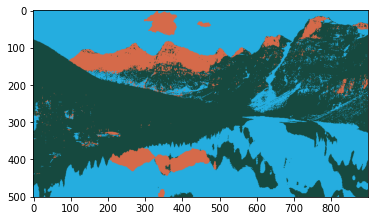

In [22]:
if __name__ == '__main__':
    img = imgArr()
    k_clusters = 3
    maxIter = 2000
    #init_centroids = 'in_pixels' OR init_centroids = 'random'
    init_centroids = 'in_pixels'   
    newCentroid, newImg = kmeans(img, k_clusters, maxIter, init_centroids) 
    showCentoidsLabels(newCentroid, newImg)
    saveImage(newImg)
    plt.imshow(newImg.astype(np.uint8))
    plt.show()